In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))

# Save the model
model.save('mnist_model.h5')


Epoch 1/10


2023-06-01 13:50:40.692119: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 24s 52ms/step - loss: 2.2801 - accuracy: 0.1551 - val_loss: 2.2310 - val_accuracy: 0.3837
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 2.2012 - accuracy: 0.2866 - val_loss: 2.1337 - val_accuracy: 0.6466
Epoch 3/10
469/469 [==============================] - 25s 53ms/step - loss: 2.1011 - accuracy: 0.4132 - val_loss: 2.0083 - val_accuracy: 0.7123
Epoch 4/10
469/469 [==============================] - 27s 58ms/step - loss: 1.9744 - accuracy: 0.4965 - val_loss: 1.8461 - val_accuracy: 0.7524
Epoch 5/10
469/469 [==============================] - 27s 58ms/step - loss: 1.8150 - accuracy: 0.5613 - val_loss: 1.6474 - val_accuracy: 0.7713
Epoch 6/10
469/469 [==============================] - 27s 57ms/step - loss: 1.6356 - accuracy: 0.5958 - val_loss: 1.4298 - val_accuracy: 0.7894
Epoch 7/10
469/469 [==============================] - 26s 56ms/step - loss: 1.4553 - accuracy: 0.6292 - val_loss: 1.2214 - val_accuracy: 0.8034
Epo

In [23]:
import cv2
import numpy as np
from keras.models import load_model

# Load the model
model = load_model('mnist_model.h5')

# Load the image file
img = cv2.imread('Data0.png', cv2.IMREAD_GRAYSCALE)

# Resize and reshape the image
img = cv2.resize(img, (28, 28))
img = img.reshape(1, 28, 28, 1)

# Normalize the image
img = img.astype('float32')
img /= 255

# Predict the digit
proba = model.predict(img)
digit = np.argmax(proba)

print("예측한 숫자 : ", digit)


1/1 [==============================] - 0s 33ms/step
예측한 숫자 :  4


NameError: name 'history' is not defined

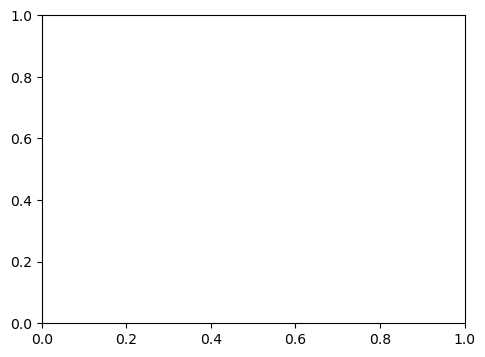

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()